In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# meta data EDA
path = '/cxr/tables/'

# datathon_cxr_adi.csv  datathon_cxr_findings.csv  datathon_cxr_insurance.csv
# datathon_cxr_cci.csv  datathon_cxr_icu.csv       datathon_cxr_metadata.csv

In [3]:
test_df = pd.read_csv('/shared/team6/test_df.csv')

In [4]:
test_df

,Unnamed: 0,AccessionNumber_anon,empi_anon,ImagePath,Cardiomegaly,Pleural Effusion,Pneumothorax,ImageView_Lateral
0,0,4565490549548134,98572016,CXR/0x5e016f0/0x10384a1a6e6466/99578940d67f633...,0.0,1.0,0.0,0
1,3,3091395609988214,91465233,CXR/0x573a611/0xafb9ba1318c76/2f448126139142c1...,0.0,0.0,0.0,0
2,4,3091395609988214,91465233,CXR/0x573a611/0xafb9ba1318c76/5dab76d3569452d3...,0.0,0.0,0.0,0
3,6,2841175740280871,57879309,CXR/0x3732b0d/0xa1808c6be7027/410f5542fa73ecd0...,1.0,0.0,0.0,0
4,7,8362369659966330,68700186,CXR/0x418481a/0x1db587e910137a/0e363cae472d8da...,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
260753,742851,8595888024628168,26912839,CXR/0x19aa847/0x1e89ea243cabc8/75faa3ee6eaef0f...,0.0,0.0,0.0,0
260754,742852,4792591912474061,79297291,CXR/0x4b9fb0b/0x1106d6427f15cd/abbc1fa9b000d5e...,0.0,0.0,0.0,0
260755,742854,7580433102217530,66754584,CXR/0x3fa9818/0x1aee5d1e4d213a/c7c693b6d0d994e...,0.0,0.0,0.0,0
260756,742859,3796372021140806,76798928,CXR/0x493dbd0/0xd7cc7bdc15d46/dc38525ee5ceb795...,0.0,0.0,0.0,0


In [5]:
metadata_df = pd.read_csv(path +'datathon_cxr_metadata.csv')

In [140]:
metadata_df.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ADI', 'ICU', 'Findings', 'CCI', 'Insurance'],
      dtype='object')

In [181]:
meta_test = pd.merge(metadata_df, test_df, on=['AccessionNumber_anon', 'empi_anon','ImagePath', 'ImageView_Lateral'], how='right')

In [173]:
test_df.shape

(260758, 8)

In [177]:
meta_test.shape

(260970, 19)

In [167]:
insurance_df = pd.read_csv(path + 'datathon_cxr_insurance.csv')

In [182]:
meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ADI', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax'],
      dtype='object')

In [183]:
insur_meta_test = pd.merge(meta_test, insurance_df, on=['empi_anon', 'StudyDate_anon'], how='inner')

In [186]:
insur_meta_test.shape

(132876, 20)

In [185]:
insur_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ADI', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE'],
      dtype='object')

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(insur_meta_test, x="INSURANCE", hue="Race", bins =5)
plt.xticks(rotation = 45)

In [51]:
combined_df

,Value_Cardiomegaly,Value_Pleural Effusion,Value_Pneumothorax
0,0.000000e+00,3.976657e-07,0.0
1,0.000000e+00,3.976657e-07,0.0
2,0.000000e+00,3.976657e-07,0.0
3,0.000000e+00,0.000000e+00,0.0
4,0.000000e+00,3.976657e-07,0.0
...,...,...,...
2514670,3.976657e-07,0.000000e+00,0.0
2514671,0.000000e+00,0.000000e+00,0.0
2514672,0.000000e+00,0.000000e+00,0.0
2514673,0.000000e+00,0.000000e+00,0.0


In [55]:
insur_meta_test.Race.unique()

array(['African American  or Black', 'Caucasian or White', 'Unknown',
       'Hispanic or Latino', 'Asian',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaskan Native'], dtype=object)

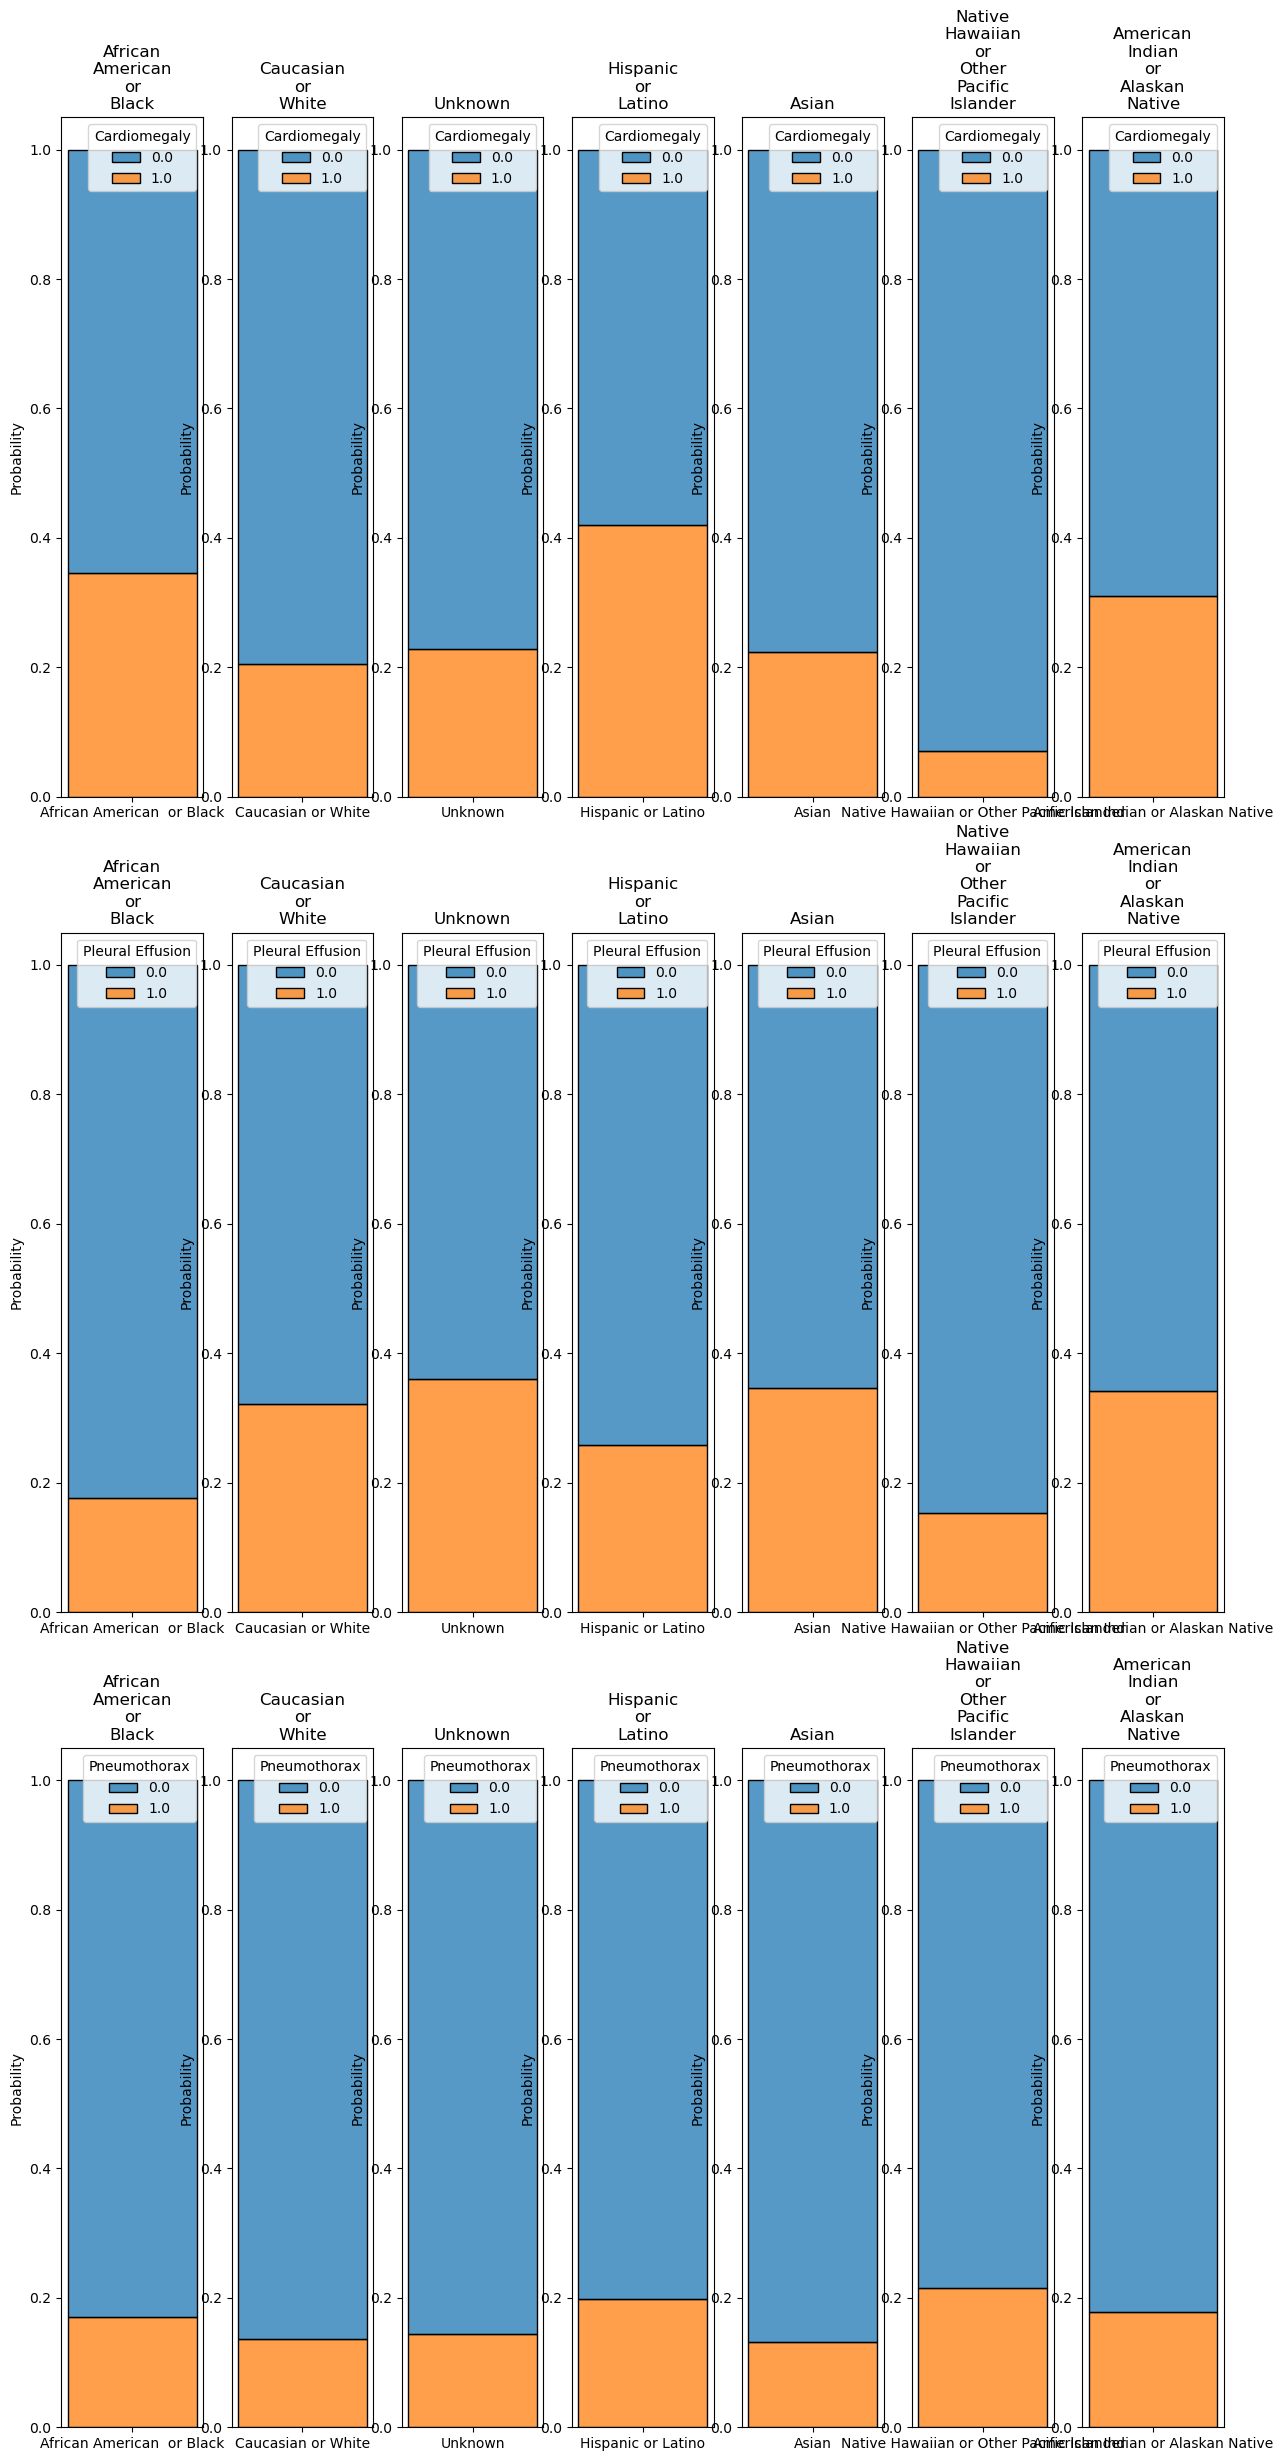

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=7)
for index, i in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']):
    for index2, j in enumerate(['African American  or Black', 'Caucasian or White', 'Unknown',
       'Hispanic or Latino', 'Asian',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaskan Native']):
        
        fig.set_figheight(30)
        fig.set_figwidth(15)
        # plt.xticks([1])
        g = sns.histplot(insur_meta_test[insur_meta_test.Race == j], x="Race", hue=i, stat='probability', cumulative = True, multiple = 'stack', discrete = 1,ax = ax[index, index2])
        g.set(xlabel=None)
        ax[index, index2].set_title('\n'.join(j.split()))
plt.show()

In [80]:
insur_meta_test.INSURANCE.value_counts()

INSURANCE
MEDICARE        1271030
HMO              377163
MEDICAID         343942
SELF PAY         196562
BLUE CROSS       119475
PPO               77806
OTHER             57763
OUTSOURCED        42533
Not Recorded      28401
Name: count, dtype: int64

In [189]:
insurance_mapping = {
    'HMO': 'Private',
     'BLUE CROSS':  'Private',
     'MEDICAID':  'Medicaid',
     'MEDICARE':  'Medicare',
     'OTHER':  'Other',
     'PPO':  'Private',
    'SELF PAY':  'Self Pay',
     'OUTSOURCED':  'Other',
     'Not Recorded':  'Not Recorded'
}

insur_meta_test['custom_insurance_category'] = insur_meta_test.INSURANCE.apply(lambda x: insurance_mapping[x])

In [85]:
metadata_df.Race.value_counts(normalize = True)

Race
Caucasian or White                           0.496275
African American  or Black                   0.438269
Unknown                                      0.033246
Asian                                        0.019980
Hispanic or Latino                           0.008322
American Indian or Alaskan Native            0.002347
Native Hawaiian or Other Pacific Islander    0.001561
Name: proportion, dtype: float64

In [93]:
race_mapping = {'African American  or Black': 'African American  or Black',
                'Caucasian or White': 'Caucasian or White', 'Unknown' : 'Other',
       'Hispanic or Latino' : 'Hispanic or Latino', 'Asian' : 'Asian',
       'Native Hawaiian or Other Pacific Islander' : 'Other',
       'American Indian or Alaskan Native' : 'Other'}
    

In [188]:
insur_meta_test['custom_race_category'] = insur_meta_test.Race.apply(lambda x: race_mapping[x])

In [95]:
insur_meta_test['custom_race_category'].value_counts(normalize = True)

custom_race_category
African American  or Black    0.605276
Caucasian or White            0.357652
Other                         0.021337
Asian                         0.010314
Hispanic or Latino            0.005421
Name: proportion, dtype: float64

In [114]:
insur_meta_test['custom_insurance_category'].unique()

array(['Medicare', 'Private', 'Medicaid', 'Not Recorded', 'Self Pay',
       'Other'], dtype=object)

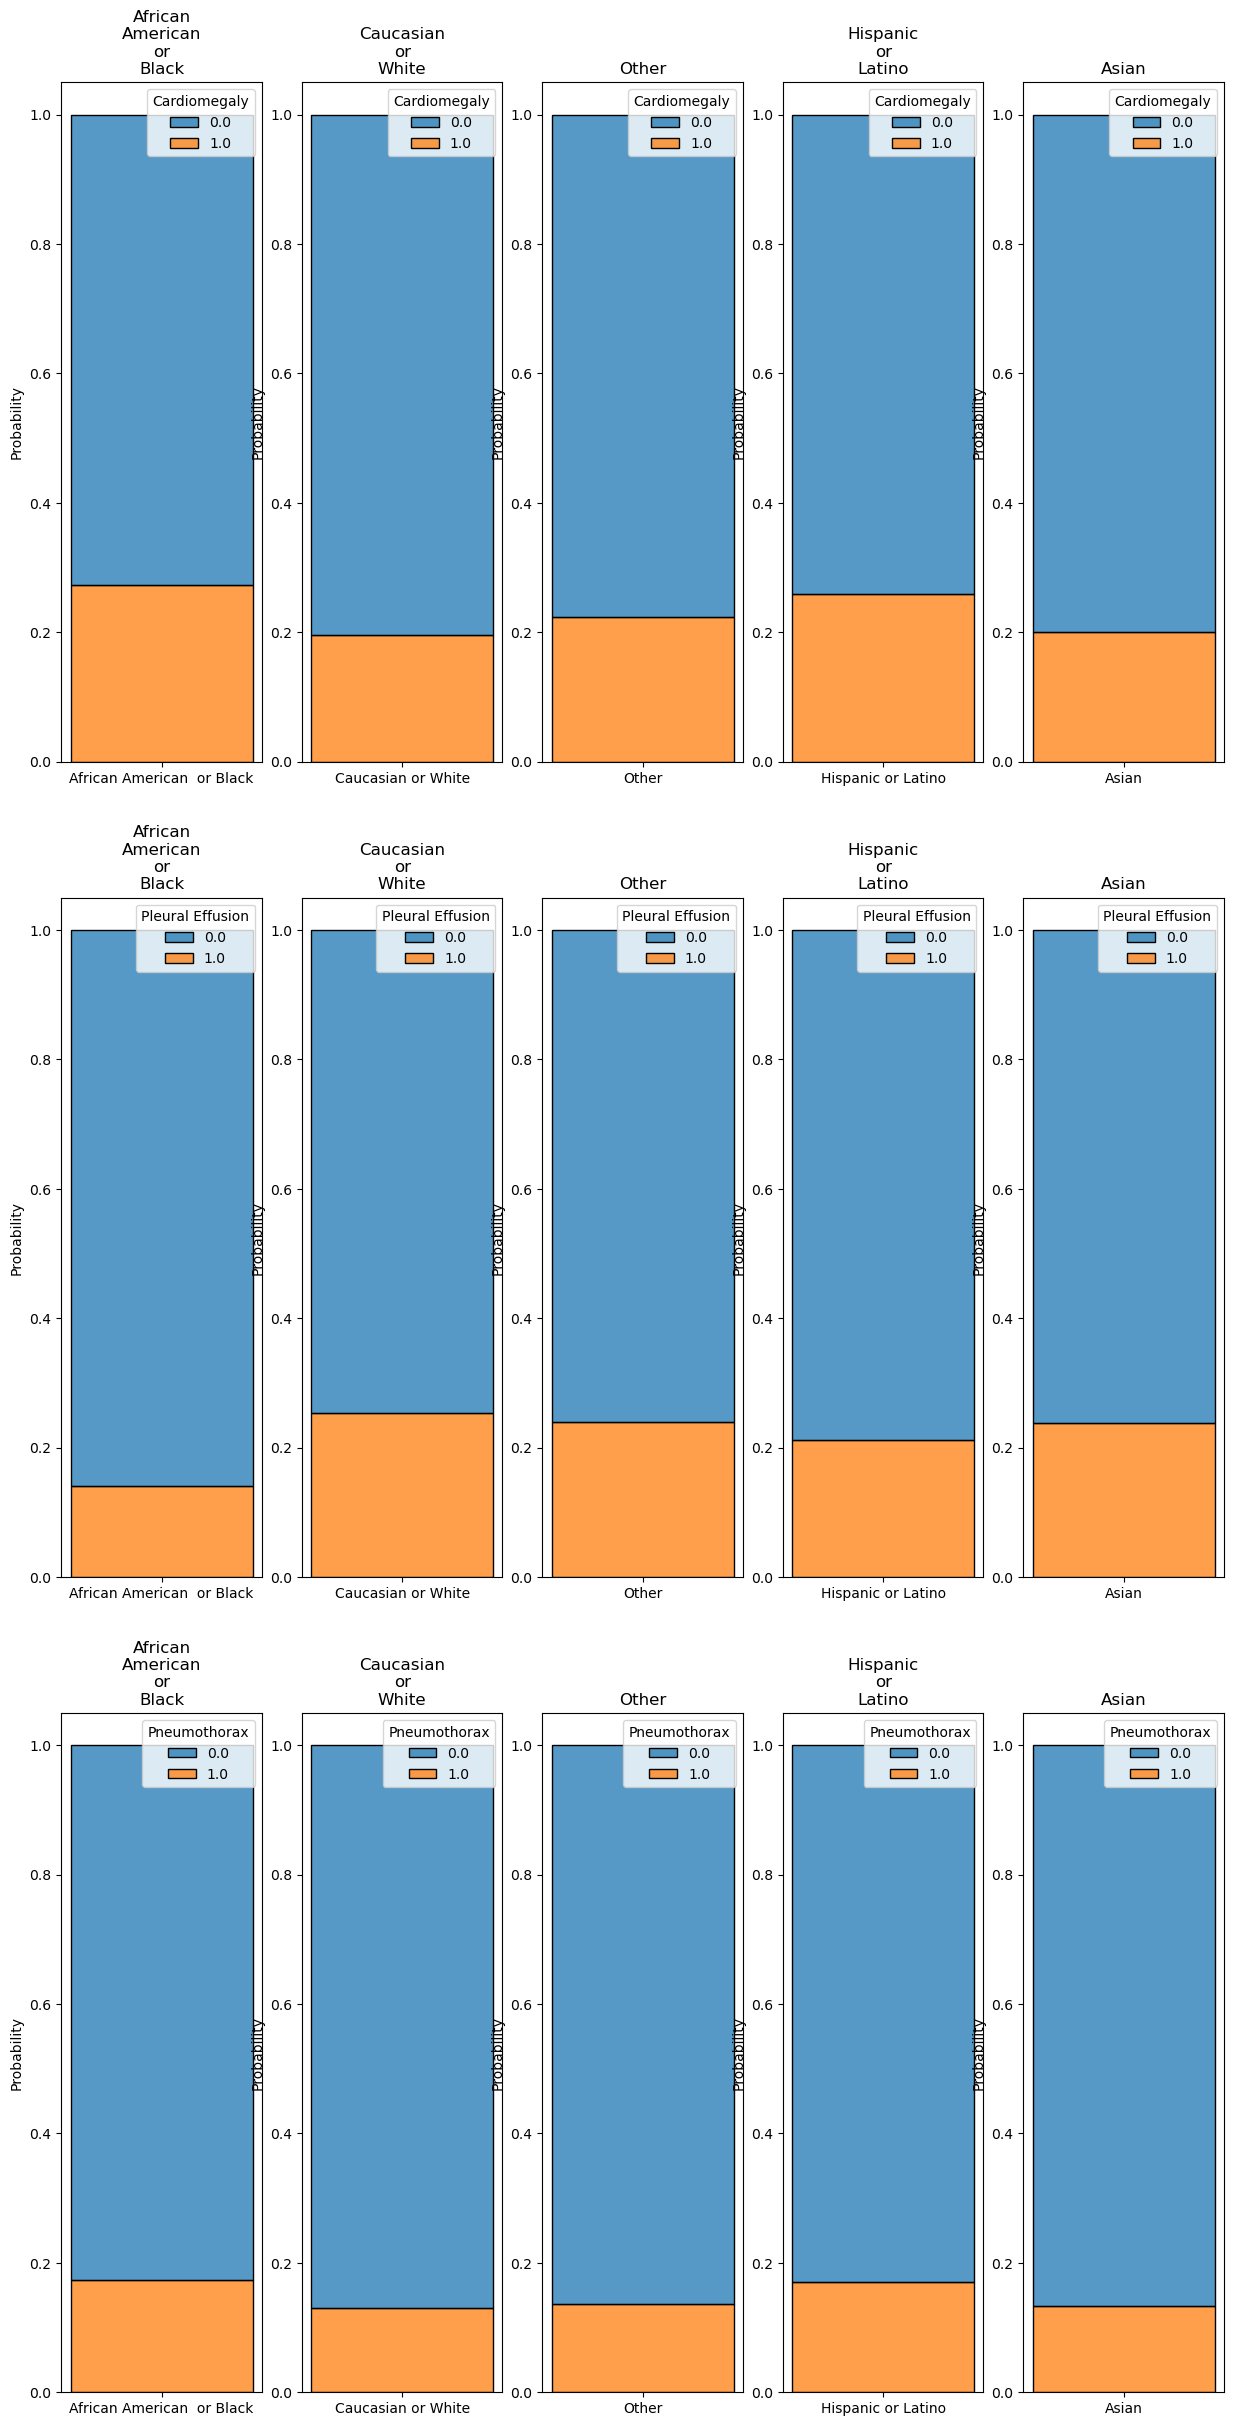

In [190]:
fig, ax = plt.subplots(nrows=3, ncols=5)
for index, i in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']):
    for index2, j in enumerate(['African American  or Black', 'Caucasian or White', 'Other',
       'Hispanic or Latino', 'Asian']):
        
        fig.set_figheight(30)
        fig.set_figwidth(15)
        # plt.xticks([1])
        g = sns.histplot(insur_meta_test[insur_meta_test['custom_race_category'] == j], x='custom_race_category', hue=i, stat='probability', cumulative = True, multiple = 'stack', discrete = 1,ax = ax[index, index2])
        g.set(xlabel=None)
        ax[index, index2].set_title('\n'.join(j.split()))

plt.savefig('{}.png'.format('Findings_Races_hist'))
plt.show()

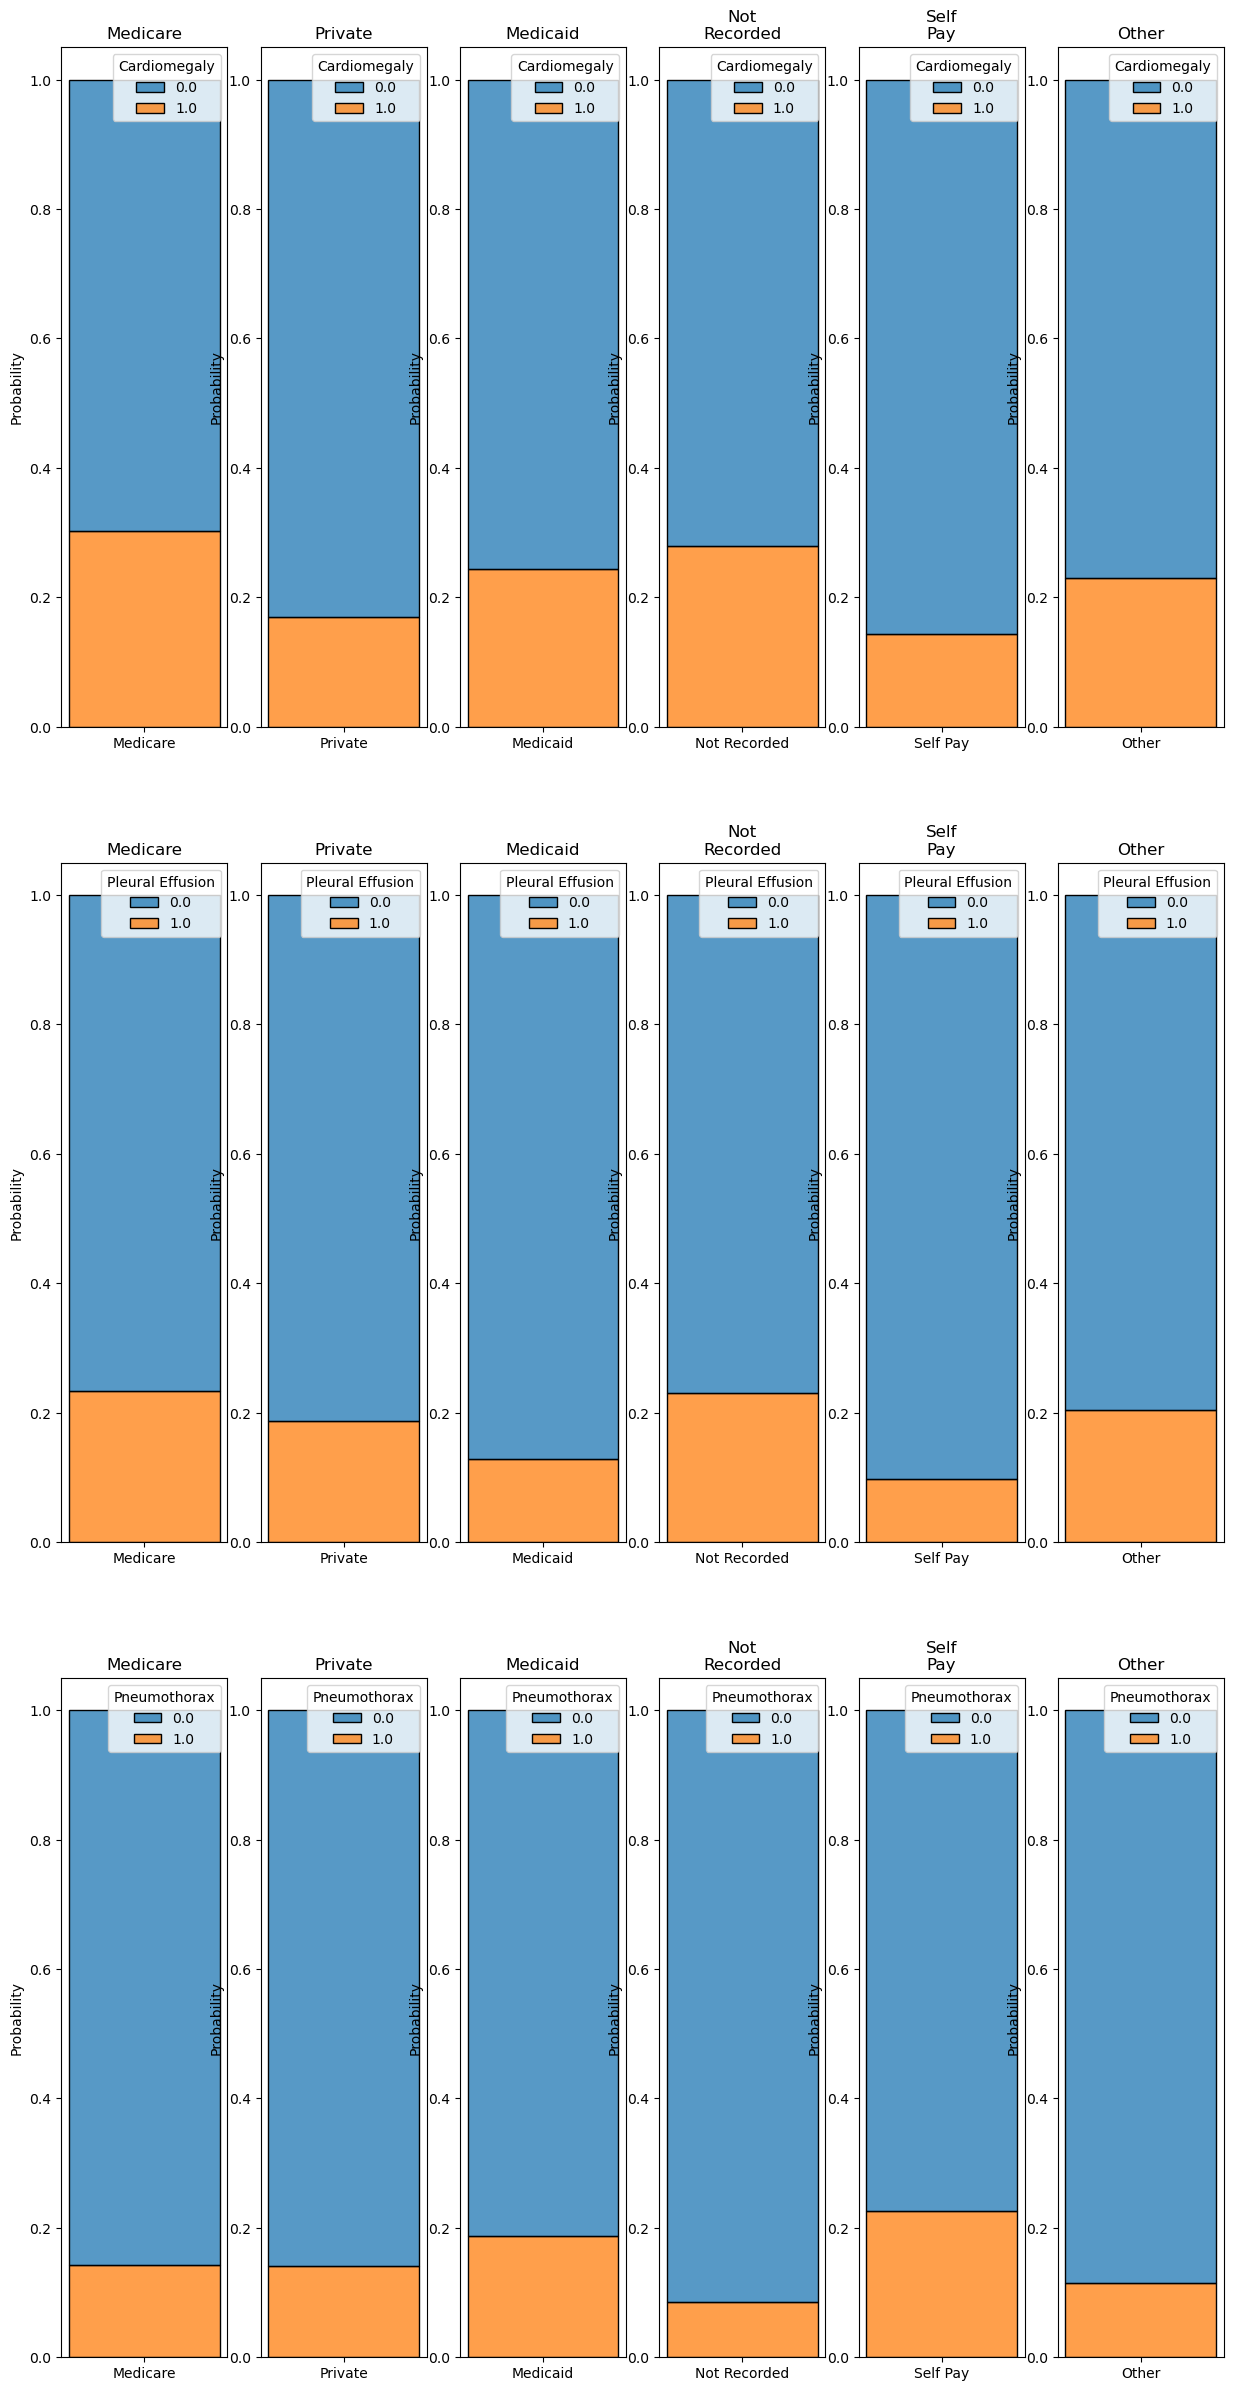

In [191]:
fig, ax = plt.subplots(nrows=3, ncols=6)
for index, i in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']):
    for index2, j in enumerate(['Medicare', 'Private', 'Medicaid', 'Not Recorded', 'Self Pay',
       'Other']):
        
        fig.set_figheight(30)
        fig.set_figwidth(15)
        # plt.xticks([1])
        g = sns.histplot(insur_meta_test[insur_meta_test['custom_insurance_category'] == j], x='custom_insurance_category', hue=i, stat='probability', cumulative = True, multiple = 'stack', discrete = 1,ax = ax[index, index2])
        g.set(xlabel=None)
        ax[index, index2].set_title('\n'.join(j.split()))

plt.savefig('{}.png'.format('Findings_Insurance_hist'))
plt.show()

In [121]:
insur_meta_test.columns

Index(['AccessionNumber_anon_x', 'empi_anon', 'StudyDate_anon', 'ImagePath_x',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral_x', 'ADI', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'AccessionNumber_anon_y', 'ImagePath_y', 'Cardiomegaly',
       'Pleural Effusion', 'Pneumothorax', 'ImageView_Lateral_y', 'INSURANCE',
       'custom_insurance_category', 'custom_race_category'],
      dtype='object')

In [192]:
datathon_cxr_adi = pd.read_csv(path + 'datathon_cxr_adi.csv')

In [193]:
datathon_cxr_adi

,ADI_NATRANK,ADI_STATERNK,ADI,empi_anon
0,49.0,4,0,27175152
1,49.0,4,0,52935422
2,49.0,4,0,27122285
3,49.0,4,0,98867095
4,49.0,4,0,48764061
...,...,...,...,...
16546,85.0,9,0,71530564
16547,23.0,2,0,64017695
16548,85.0,8,0,80861483
16549,17.0,5,0,33849462


In [194]:
len(datathon_cxr_adi.empi_anon.unique())

16551

In [195]:
insur_meta_test.shape

(132876, 22)

In [196]:
len(insur_meta_test.empi_anon.unique())

48606

In [220]:
insur_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ADI', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category'],
      dtype='object')

In [222]:
insur_meta_test.drop(columns = 'ADI', inplace = True)

In [223]:
insur_adi_meta_test = insur_meta_test.merge(datathon_cxr_adi, on = 'empi_anon', how = 'left')

In [224]:
insur_adi_meta_test.shape

(132876, 24)

In [225]:
insur_adi_meta_test.drop_duplicates(inplace = True)

In [226]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

In [228]:
insur_adi_meta_test.ADI_STATERNK.value_counts()

ADI_STATERNK
3.0     3087
4.0     2728
2.0     2269
1.0     2237
8.0     2083
5.0     1482
7.0     1010
9.0      677
6.0      656
10.0     210
Name: count, dtype: int64

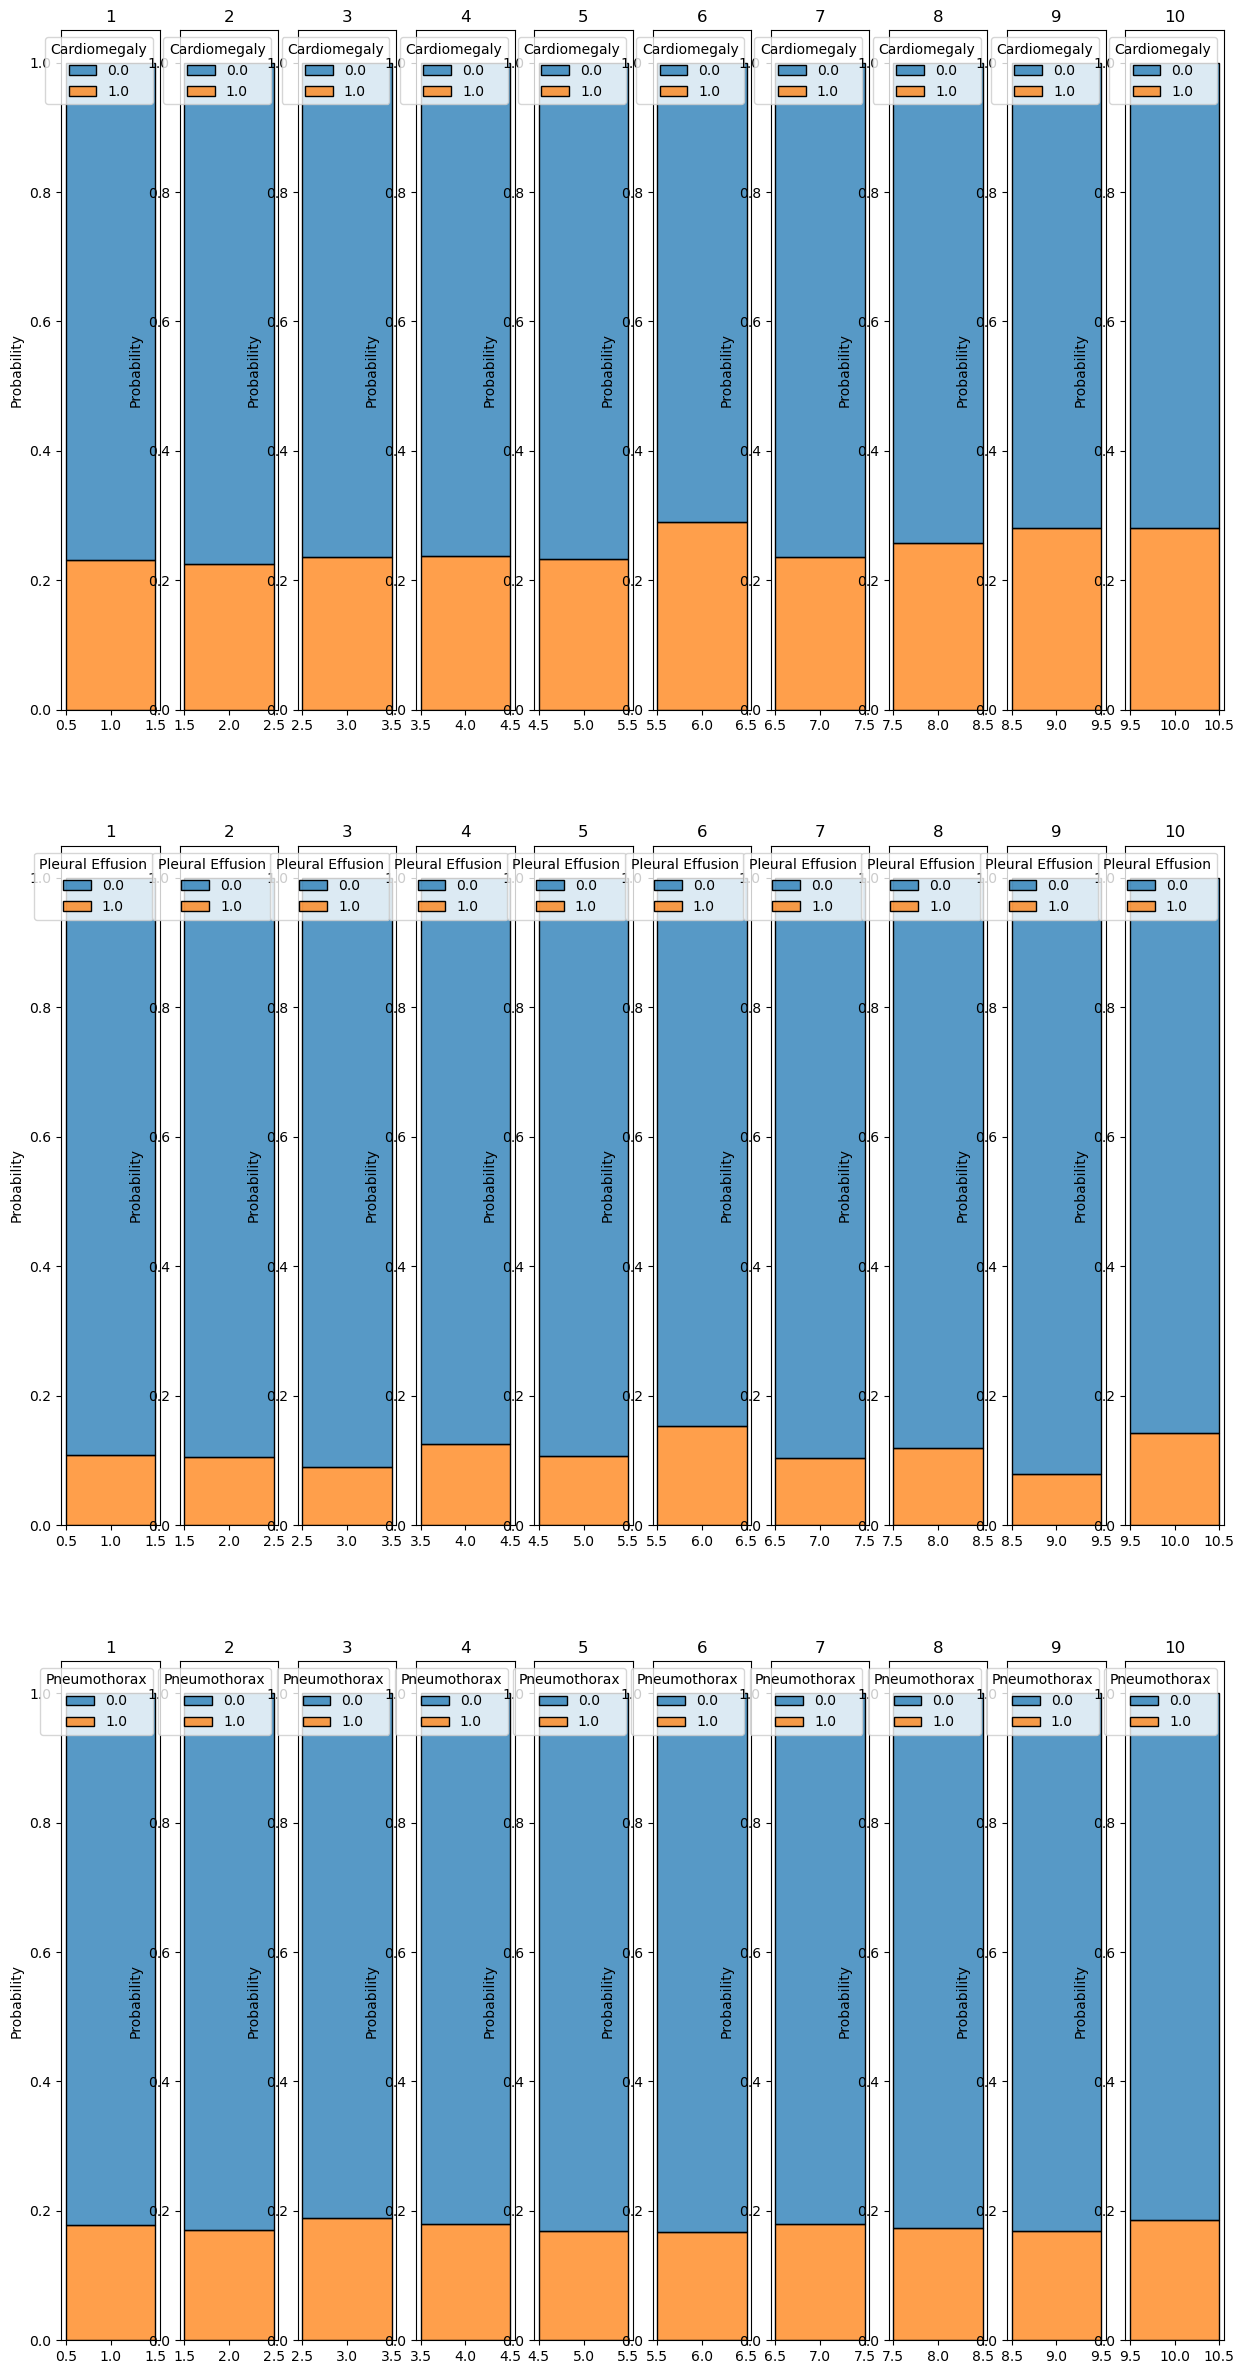

In [236]:
fig, ax = plt.subplots(nrows=3, ncols=10)
for index, i in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']):
    for index2, j in enumerate(range(1, 11, 1)):
        
        fig.set_figheight(30)
        fig.set_figwidth(15)
        # plt.xticks([1])
        g = sns.histplot(insur_adi_meta_test[insur_adi_meta_test.ADI_STATERNK == j], x='ADI_STATERNK', hue=i, stat='probability', cumulative = True, multiple = 'stack', discrete = 1,ax = ax[index, index2])
        g.set(xlabel=None)
        ax[index, index2].set_title(j)
plt.show()

In [258]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

In [294]:
insur_adi_meta_test.shape

(131249, 24)

In [293]:
insur_adi_meta_test.ADI.sum()

812.0

In [291]:
insur_adi_meta_test[insur_adi_meta_test['Pleural Effusion']== 1].ADI.sum()

73.0

In [292]:
insur_adi_meta_test[insur_adi_meta_test['Pneumothorax']== 1].ADI.sum()

143.0

In [298]:
findings_sex_lst

[Sex
 Female    0.239244
 Male      0.234749
 Name: Cardiomegaly, dtype: float64,
 Sex
 Female    0.172346
 Male      0.215835
 Name: Pleural Effusion, dtype: float64,
 Sex
 Female    0.154977
 Male      0.152718
 Name: Pneumothorax, dtype: float64]

In [308]:
f_sex_df.reset_index()

,Sex,Cardiomegaly,Pleural Effusion,Pneumothorax
0,Female,0.239244,0.172346,0.154977
1,Male,0.234749,0.215835,0.152718


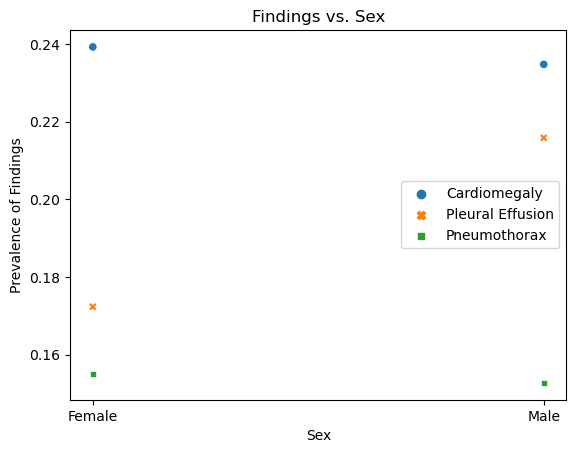

In [312]:
findings_sex_lst = []

for i in ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']:
    

    findings_sex_lst.append(insur_adi_meta_test.groupby('Sex')[i].mean())

    
g = sns.scatterplot(findings_sex_lst)

plt.title('Findings vs. Sex')
plt.ylabel('Prevalence of Findings')
plt.savefig('findings_sex.png')

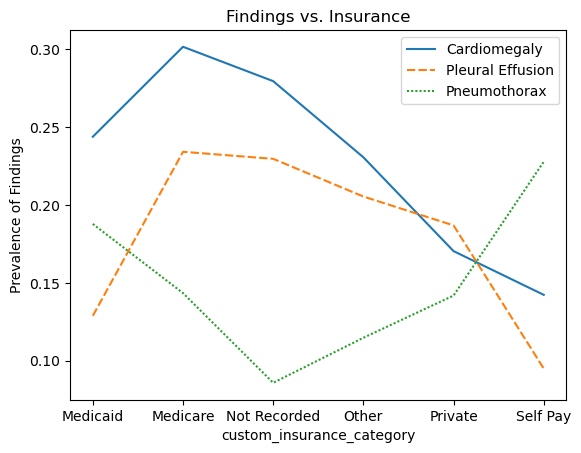

In [313]:
findings_insurance_lst = []

for i in ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']:
    

    findings_insurance_lst.append(insur_adi_meta_test.groupby('custom_insurance_category')[i].mean())
# insur_adi_meta_test[insur_adi_meta_test.ADI_STATERNK == j]
# Cardiomegaly	Pleural Effusion	Pneumothorax

g = sns.lineplot(findings_insurance_lst)

plt.title('Findings vs. Insurance')
plt.ylabel('Prevalence of Findings')
plt.savefig('findings_insurance.png')

In [262]:
findings_insurance_lst

[custom_insurance_category
 Medicaid        0.243813
 Medicare        0.301623
 Not Recorded    0.279534
 Other           0.230611
 Private         0.170310
 Self Pay        0.142205
 Name: Cardiomegaly, dtype: float64,
 custom_insurance_category
 Medicaid        0.128738
 Medicare        0.234135
 Not Recorded    0.229617
 Other           0.205388
 Private         0.186827
 Self Pay        0.094829
 Name: Pleural Effusion, dtype: float64,
 custom_insurance_category
 Medicaid        0.187759
 Medicare        0.143320
 Not Recorded    0.085691
 Other           0.114619
 Private         0.141740
 Self Pay        0.227757
 Name: Pneumothorax, dtype: float64]

In [261]:
findings_adi_lst = []

for i in ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']:
    

    findings_adi_lst.append(insur_adi_meta_test.groupby('ADI_STATERNK')[i].mean())
# insur_adi_meta_test[insur_adi_meta_test.ADI_STATERNK == j]
# Cardiomegaly	Pleural Effusion	Pneumothorax

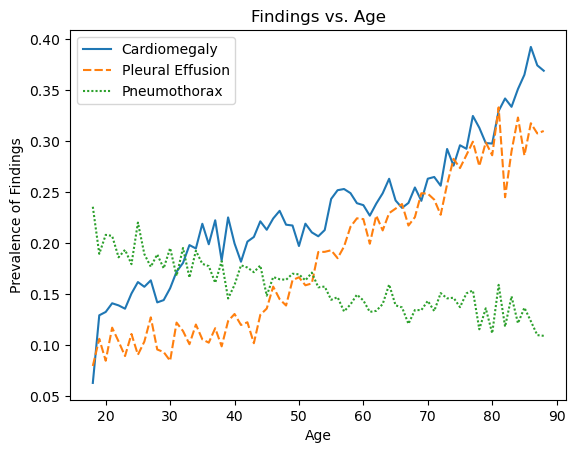

In [283]:
findings_age_lst = []

for i in ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']:
    

    findings_age_lst.append(insur_adi_meta_test.groupby('Age')[i].mean())
g = sns.lineplot(findings_age_lst)

plt.title('Findings vs. Age')
plt.ylabel('Prevalence of Findings')
plt.savefig('findings_age.png')

In [315]:
findings_race_lst


[custom_race_category
 African American  or Black    0.272759
 Asian                         0.200678
 Caucasian or White            0.195920
 Hispanic or Latino            0.260870
 Other                         0.222758
 Name: Cardiomegaly, dtype: float64,
 custom_race_category
 African American  or Black    0.140267
 Asian                         0.236857
 Caucasian or White            0.254109
 Hispanic or Latino            0.212815
 Other                         0.240030
 Name: Pleural Effusion, dtype: float64,
 custom_race_category
 African American  or Black    0.174094
 Asian                         0.135670
 Caucasian or White            0.131054
 Hispanic or Latino            0.169336
 Other                         0.137668
 Name: Pneumothorax, dtype: float64]

In [360]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

Text(0.5, 0.9, 'Findings vs. State ADI')

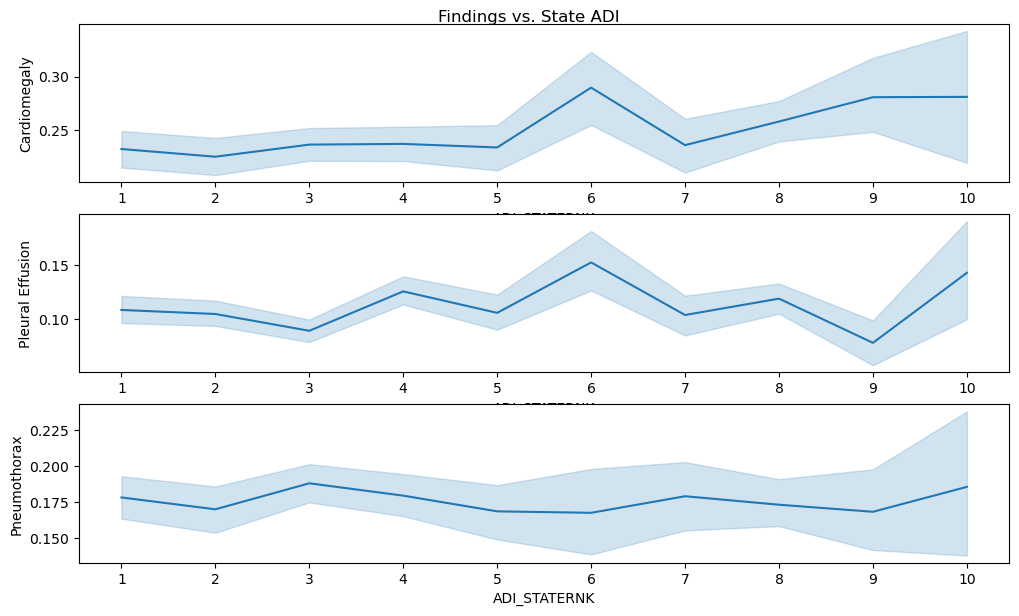

In [381]:
f, ax = plt.subplots(3,1,figsize=(12,7))


for ind, i in enumerate(finding_lst):
    # ax[ind].set_ylim(0,1)
    g = sns.lineplot(ax=ax[ind], data=insur_adi_meta_test, y=i, x="ADI_STATERNK")
    g.set_xticks(range(1,11))

f.suptitle('Findings vs. State ADI',y = 0.9)

# plt.savefig('Findings vs. Race.png')

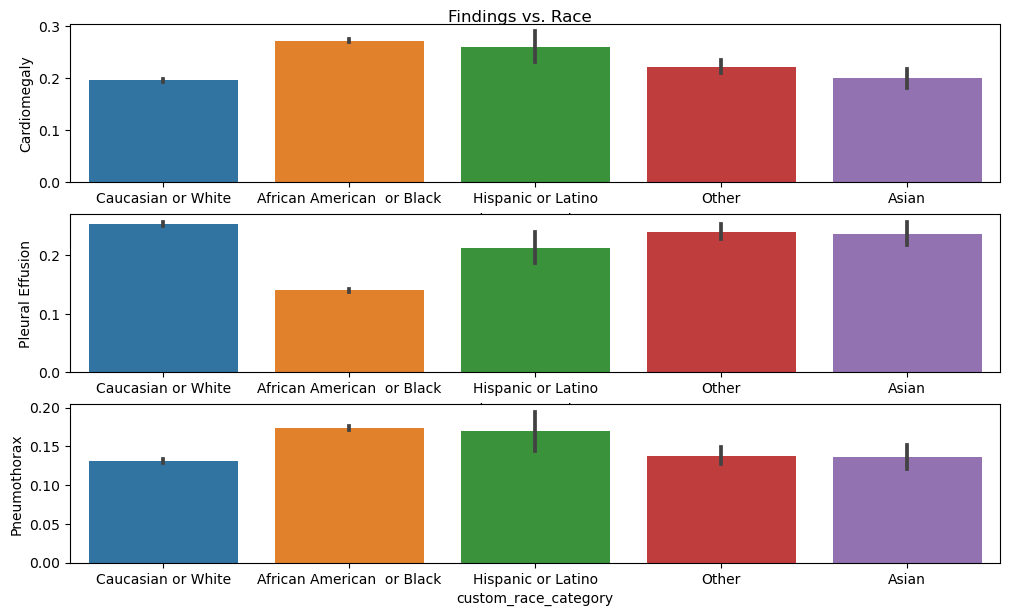

In [380]:
f, ax = plt.subplots(3,1,figsize=(12,7))

for ind, i in enumerate(finding_lst):
    # ax[ind].set_ylim(0,1)
    sns.barplot(ax=ax[ind], data=insur_adi_meta_test, y=i, x="custom_race_category")

f.suptitle('Findings vs. Race',y = 0.9)
plt.savefig('Findings vs. Race.png')

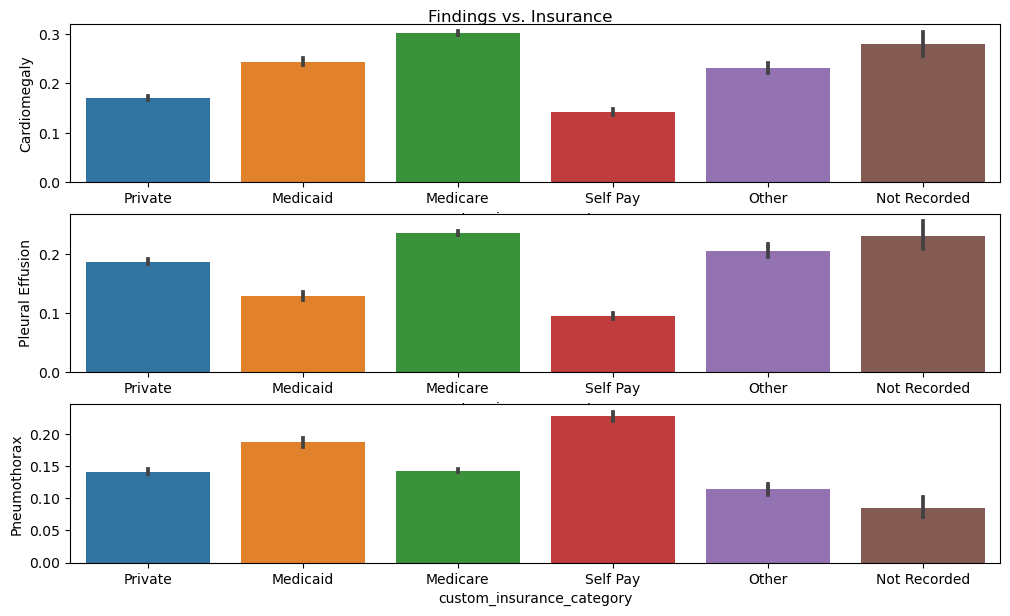

In [357]:
f, ax = plt.subplots(3,1,figsize=(12,7))

for ind, i in enumerate(finding_lst):
    sns.barplot(ax=ax[ind], data=insur_adi_meta_test, y=i, x="custom_insurance_category")

f.suptitle('Findings vs. Insurance',y = 0.9)
plt.savefig('Findings vs. Insurance.png')

# intersections

In [384]:
race_mapping.values()

dict_values(['African American  or Black', 'Caucasian or White', 'Other', 'Hispanic or Latino', 'Asian', 'Other', 'Other'])

In [394]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

In [395]:
insur_adi_meta_test_copy = insur_adi_meta_test.copy()

In [399]:
insur_adi_meta_test_copy.drop(columns = ['Race', 'Insurance'], inplace = True)

In [403]:
insur_adi_meta_test_copy.rename(columns = {'custom_race_category':'Race', 'custom_insurance_category': 'Insurance'}, inplace = True)

In [407]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

In [413]:
race_mapping.values()

dict_values(['African American  or Black', 'Caucasian or White', 'Other', 'Hispanic or Latino', 'Asian', 'Other', 'Other'])

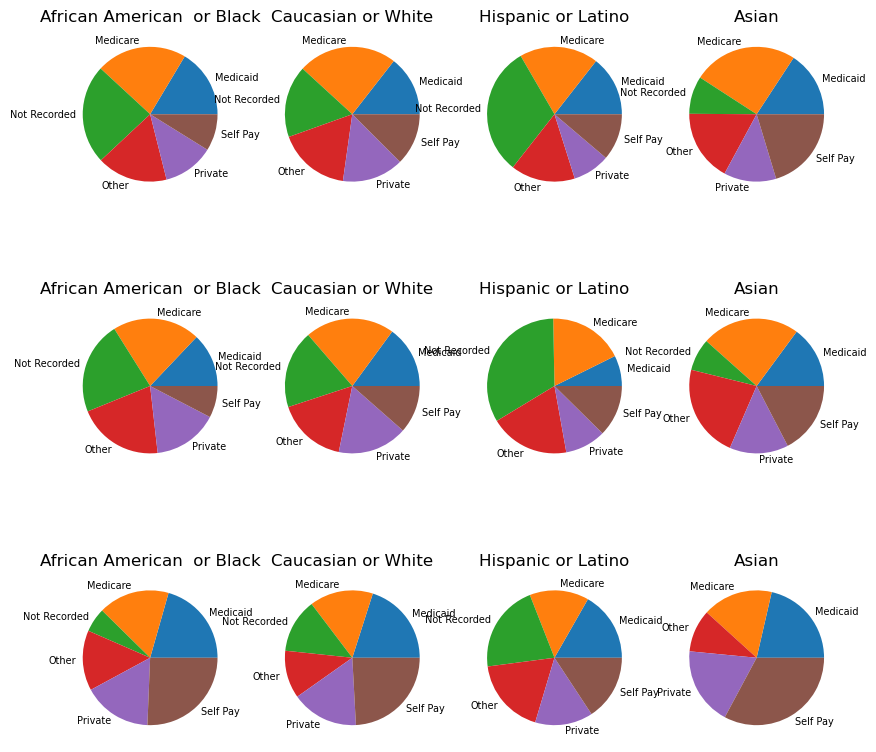

In [453]:
f, ax = plt.subplots(3,4, figsize = (10, 15))
for ind1, i in enumerate(['African American  or Black', 'Caucasian or White', 'Hispanic or Latino', 'Asian',]):
    for ind2, j in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']): 
        insur_adi_meta_test_copy[insur_adi_meta_test_copy.Race == i].groupby("Insurance")[j].mean().plot.pie(y=j, ax =  ax[ind2,ind1], title = i, figsize = (10,10),fontsize = 7, ylabel = '')
        
# fig.supxlabel(ind1)

fig.supylabel(ind2)

plt.show()

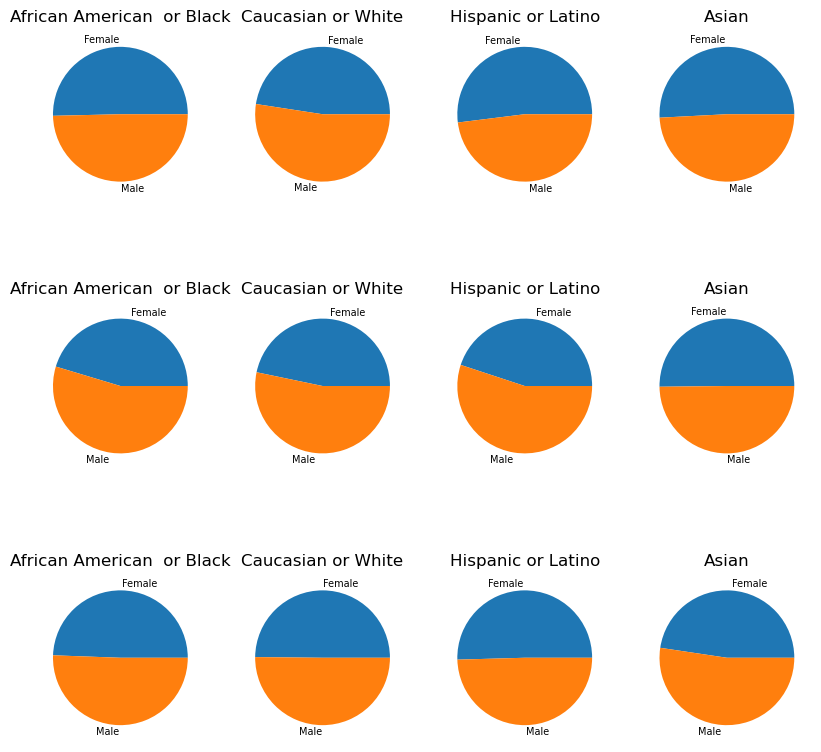

In [452]:
f, ax = plt.subplots(3,4, figsize = (10, 15))
for ind1, i in enumerate(['African American  or Black', 'Caucasian or White', 'Hispanic or Latino', 'Asian',]):
    for ind2, j in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']): 
        insur_adi_meta_test_copy[insur_adi_meta_test_copy.Race == i].groupby("Sex")[j].mean().plot.pie(y=j, ax =  ax[ind2,ind1], title = i, figsize = (10,10),fontsize = 7, ylabel = '')
        
# fig.supxlabel(ind1)

fig.supylabel(ind2)

plt.show()

In [449]:
insur_adi_meta_test.columns

Index(['AccessionNumber_anon', 'empi_anon', 'StudyDate_anon', 'ImagePath',
       'Sex', 'Race', 'BMI_value', 'Age', 'ImageView_Frontal',
       'ImageView_Lateral', 'ICU', 'Findings', 'CCI', 'Insurance',
       'Unnamed: 0', 'Cardiomegaly', 'Pleural Effusion', 'Pneumothorax',
       'INSURANCE', 'custom_race_category', 'custom_insurance_category',
       'ADI_NATRANK', 'ADI_STATERNK', 'ADI'],
      dtype='object')

In [482]:
insur_adi_meta_test_copy.ADI_STATERNK = insur_adi_meta_test_copy.ADI_STATERNK.fillna(0).astype(int)

In [483]:
insur_adi_meta_test_copy.ADI_STATERNK

0         0
1         4
2         0
3         0
4         0
         ..
132871    0
132872    0
132873    8
132874    0
132875    0
Name: ADI_STATERNK, Length: 131249, dtype: int64

In [479]:
insur_adi_meta_test_copy.ADI_STATERNK.replace(0, np.nan, inplace = True)

In [490]:
adi_mapping = {0: np.nan, 1: '1-2', 2:'1-2', 3:'3-4', 4:'3-4', 5:'5-6', 6:'5-6', 7:'7-8', 8:'7-8', 9:'9-10' , 10:'9-10' }

In [491]:
insur_adi_meta_test_copy['ADI_STATERNK_NEW'] = insur_adi_meta_test_copy.ADI_STATERNK.apply(lambda x: adi_mapping[x]) 

In [492]:
insur_adi_meta_test_copy[insur_adi_meta_test_copy.Race == i].groupby('ADI_STATERNK_NEW')[j].mean()

ADI_STATERNK_NEW
1-2    0.106383
3-4    0.072727
5-6    0.080000
7-8    0.444444
Name: Pneumothorax, dtype: float64

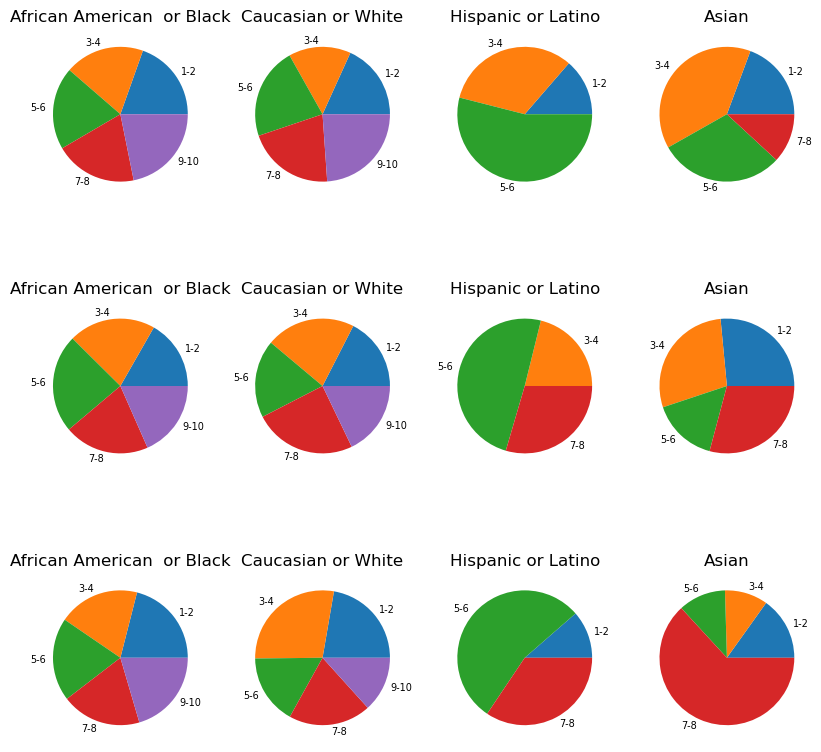

In [493]:
f, ax = plt.subplots(3,4, figsize = (10, 15))
for ind1, i in enumerate(['African American  or Black', 'Caucasian or White', 'Hispanic or Latino', 'Asian',]):
    for ind2, j in enumerate(['Cardiomegaly', 'Pleural Effusion', 'Pneumothorax']): 
        insur_adi_meta_test_copy[insur_adi_meta_test_copy.Race == i].groupby('ADI_STATERNK_NEW')[j].mean().plot.pie(y=j, ax =  ax[ind2,ind1], title = i, figsize = (10,10),fontsize = 7, ylabel = '')
        
# fig.supxlabel(ind1)

fig.supylabel(ind2)

plt.show()

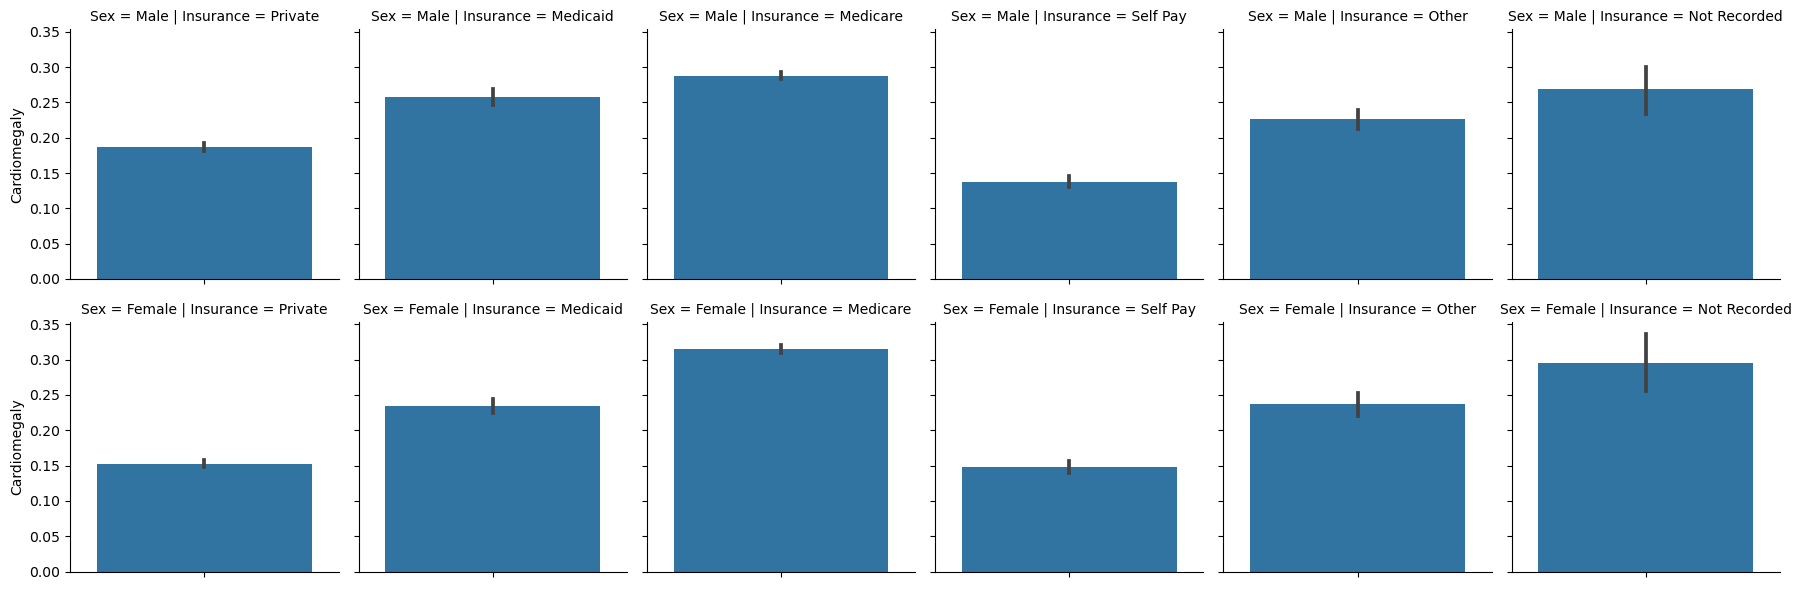

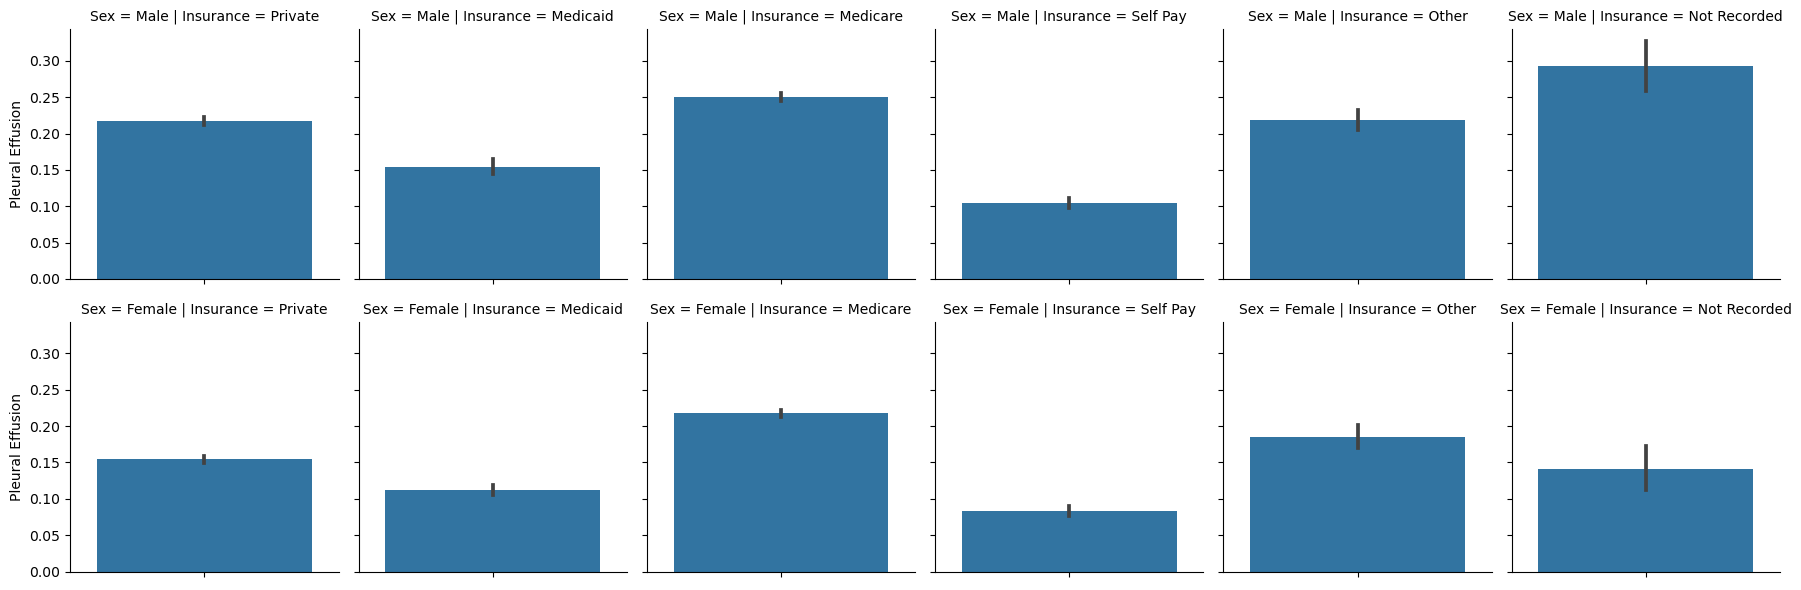

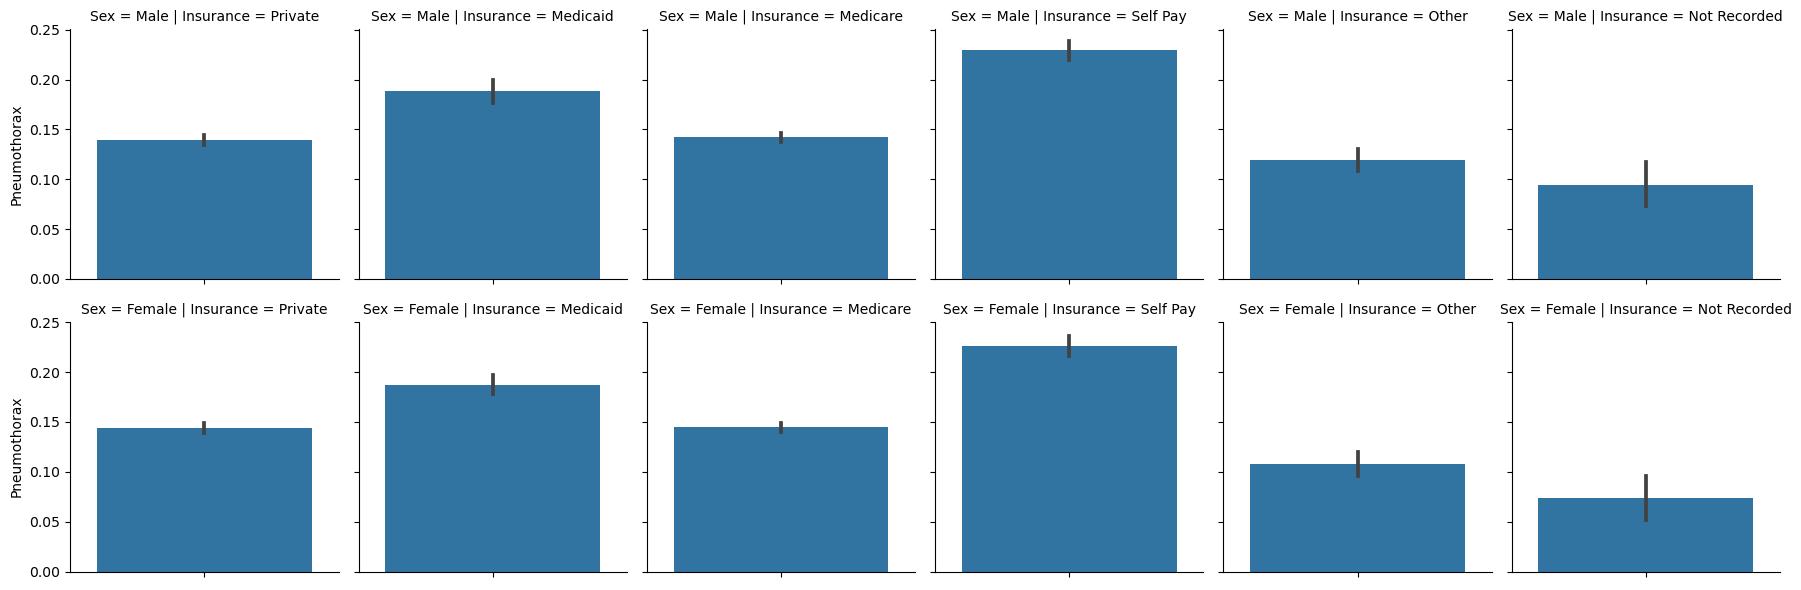

In [404]:

for ind, i in enumerate(finding_lst):
    g = sns.FacetGrid(insur_adi_meta_test_copy, col="Insurance", row = 'Sex')
    g.map_dataframe(sns.barplot, y=i,)

In [ ]:

for ind, i in enumerate(finding_lst):
    g = sns.FacetGrid(insur_adi_meta_test, col="custom_insurance_category", row = 'cu')
    g.map_dataframe(sns.barplot, x=i,)

ValueError: min() arg is an empty sequence

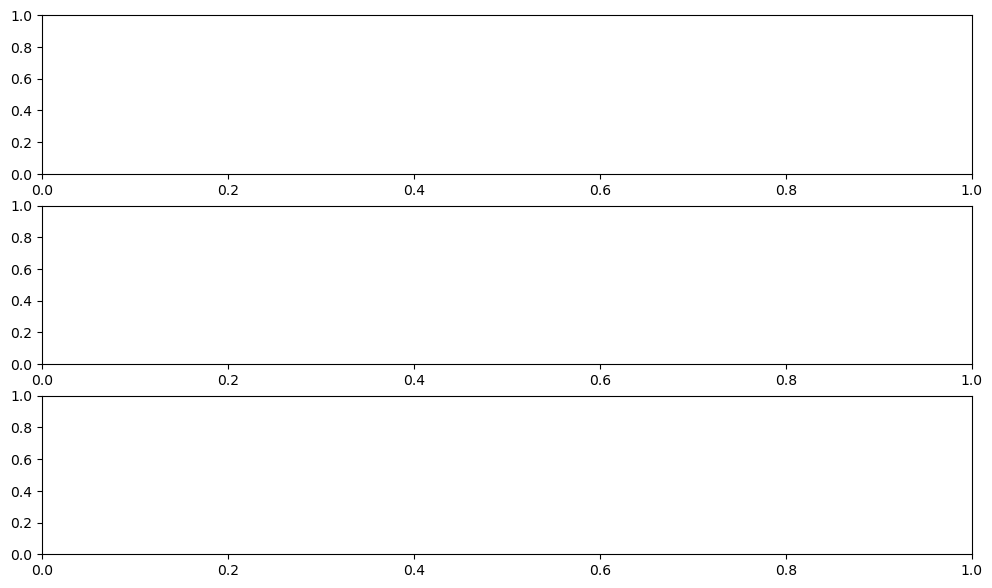

In [388]:
f, ax = plt.subplots(3,1,figsize=(12,7))

for ind, i in enumerate(finding_lst):
    for j in list(race_mapping.values()):
        sns.barplot(ax=ax[ind], data=insur_adi_meta_test[insur_adi_meta_test["custom_insurance_category"] == j], y=i, x="custom_insurance_category")

f.suptitle('Findings vs. Insurance and Race',y = 0.9)
# plt.savefig('Findings vs. Insurance.png')

In [ ]:
findings_race_lst = []
plt.figure(figsize=(10,7))

finding_lst = ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']
for i in finding_lst :
    
    series = insur_adi_meta_test.groupby('custom_race_category')[i].mean()
    findings_race_lst.append(series)
    g = plt.bar(x = series.index, height = series,  edgecolor='black', linewidth=1.2, color=colors[i], label=i)

colors = dict(zip(finding_lst, ['red', 'blue', 'green']))       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.title('Findings vs. Race')
plt.ylabel('Prevalence of Findings')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('findings_race.png')

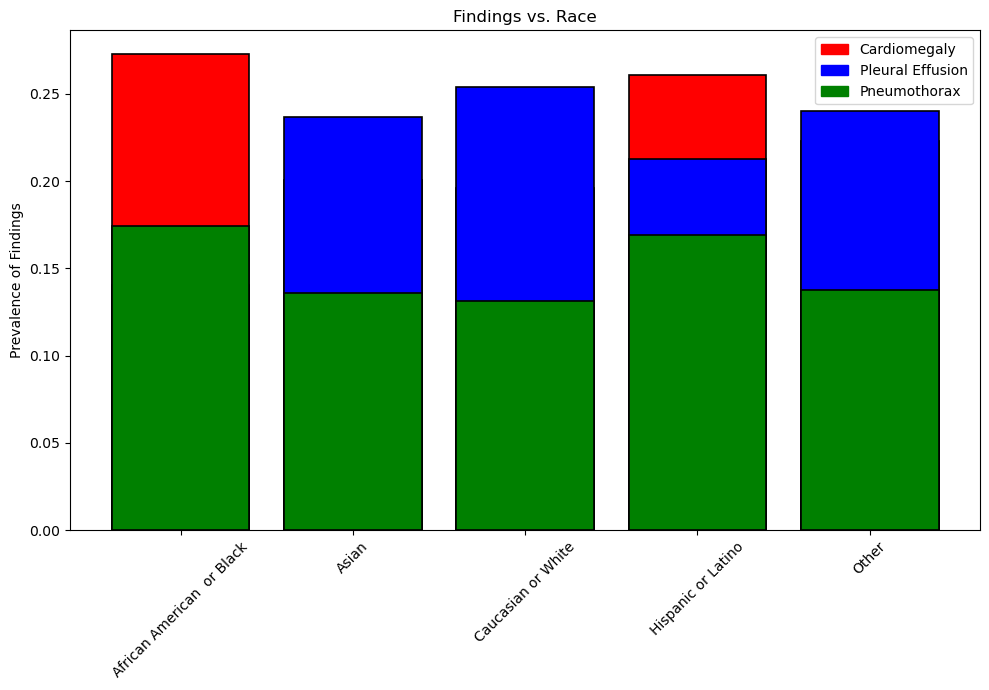

In [330]:
findings_race_lst = []
plt.figure(figsize=(10,7))

finding_lst = ['Cardiomegaly','Pleural Effusion', 'Pneumothorax']
for i in finding_lst :
    
    series = insur_adi_meta_test.groupby('custom_race_category')[i].mean()
    findings_race_lst.append(series)
    g = plt.bar(x = series.index, height = series,  edgecolor='black', linewidth=1.2, color=colors[i], label=i)

colors = dict(zip(finding_lst, ['red', 'blue', 'green']))       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.title('Findings vs. Race')
plt.ylabel('Prevalence of Findings')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('findings_race.png')

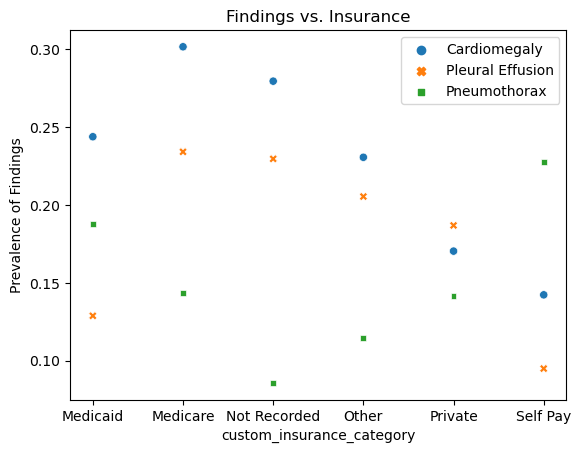

In [265]:
g = sns.scatterplot(findings_insurance_lst)

plt.title('Findings vs. Insurance')
plt.ylabel('Prevalence of Findings')
plt.savefig('findings_adi.png')

In [ ]:
sns.Facetrid()

In [108]:
insur_meta_test.INSURANCE.value_counts(normalize=True)

INSURANCE
MEDICARE        0.505445
HMO             0.149985
MEDICAID        0.136774
SELF PAY        0.078166
BLUE CROSS      0.047511
PPO             0.030941
OTHER           0.022970
OUTSOURCED      0.016914
Not Recorded    0.011294
Name: proportion, dtype: float64

In [111]:
sns.heatmap(insur_meta_test[['custom_race_category','custom_insurance_category']])

ValueError: could not convert string to float: 'African American  or Black'

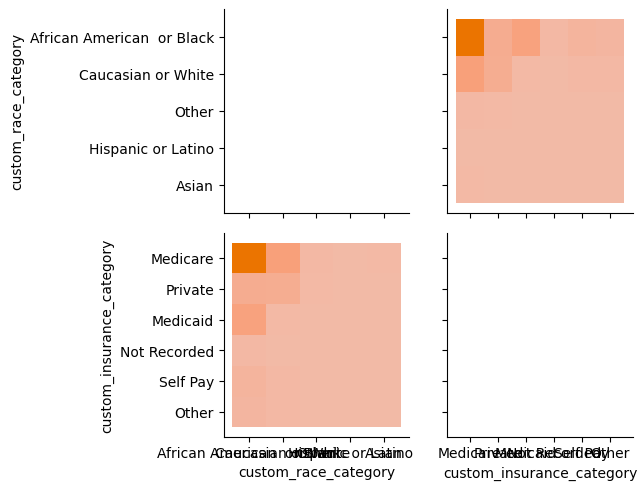

In [112]:
g = sns.PairGrid(insur_meta_test, vars=['custom_race_category','custom_insurance_category'], hue='Cardiomegaly')
g.map_offdiag(sns.histplot)

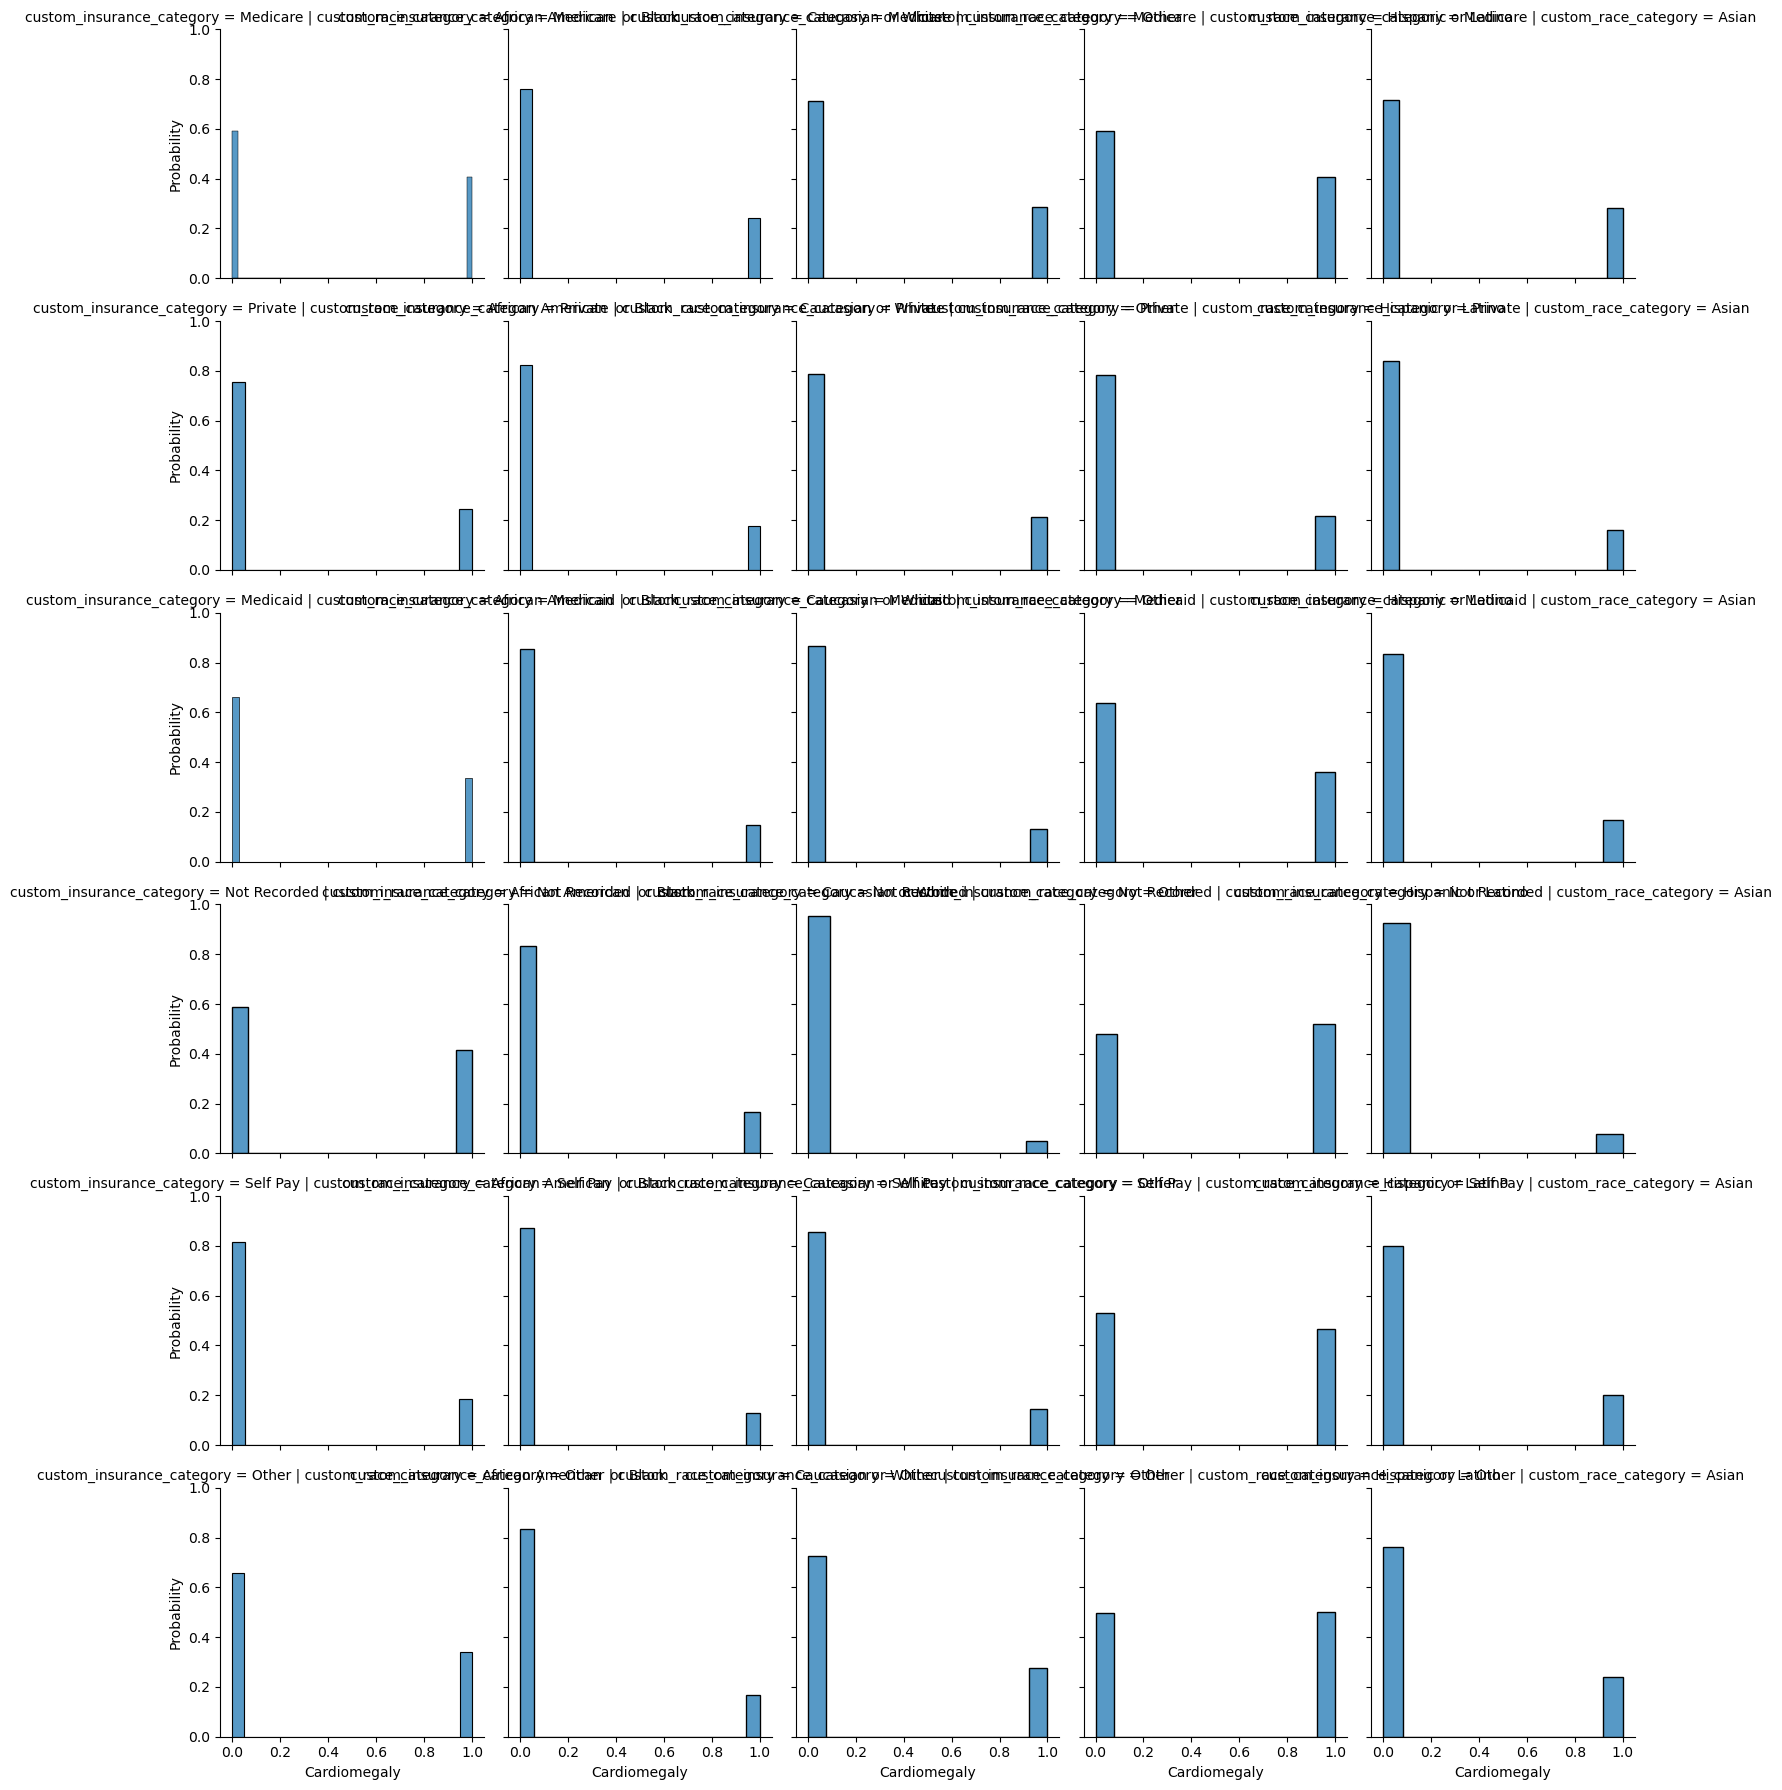

In [109]:
g = sns.FacetGrid(insur_meta_test, col='custom_race_category', row='custom_insurance_category')
g.map(sns.histplot, 'Cardiomegaly', stat= 'probability', multiple = 'stack')